## Importing the relevant packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

import seaborn as sns
sns.set()
warnings.filterwarnings('ignore')

## Importing the Data and Pre-processing 

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv") 

In [3]:
df_comp=raw_csv_data.copy()
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [4]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')


size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]
df['market_value']=df_comp.ftse
df.market_value.pct_change(1)
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']

df['returns'] = df.market_value.pct_change(1).mul(100)
df = df.iloc[1:]

In [33]:
df['returns'].head(10)

date
1994-01-11   -0.779229
1994-01-12   -1.222988
1994-01-13   -0.356166
1994-01-14    1.206842
1994-01-17    0.213788
1994-01-18    0.856263
1994-01-19    1.109685
1994-01-20   -0.148483
1994-01-21    0.409799
1994-01-24   -0.080076
Freq: B, Name: returns, dtype: float64

## The DF-Test
Test for stationarity

In [6]:
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 

In [7]:
df['returns'] = df.market_value.pct_change(1).mul(100)
df = df.iloc[1:]

In [8]:
sts.adfuller(df.returns)

(-12.790332603910002,
 7.099523586679614e-24,
 32,
 4986,
 {'1%': -3.43166220814716,
  '5%': -2.862119853748156,
  '10%': -2.567078656914853},
 15690.778602127364)

# LLR

In [9]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

## ACF and PACF for Returns

In [10]:
import statsmodels.graphics.tsaplots as sgt

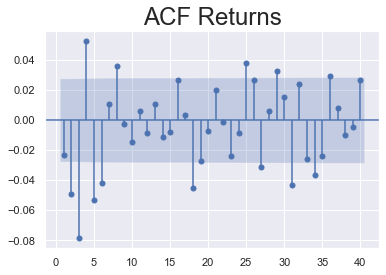

In [11]:
sgt.plot_acf(df.returns, lags=40, zero = False)
plt.title("ACF Returns", size=24)
plt.show()

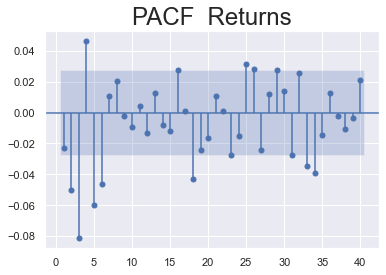

In [12]:
sgt.plot_pacf(df.returns, lags = 40, zero = False, method = ('ols'))
plt.title("PACF  Returns", size=24)
plt.show()

In [13]:
from statsmodels.tsa.arima_model import ARMA

## AR(1) for Returns

In [14]:
model_ar1 = ARMA(df.returns, order = (1,0))

In [15]:
results_ar1 = model_ar1.fit()

In [16]:
results_ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(1, 0)   Log Likelihood               -7928.655
Method:                       css-mle   S.D. of innovations              1.174
Date:                Fri, 07 Jan 2022   AIC                          15863.311
Time:                        18:29:23   BIC                          15882.874
Sample:                    01-11-1994   HQIC                         15870.166
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.161      0.246      -0.013       0.051
ar.L1.returns    -0.0230      0.014     -1.633      0.103      -0.051       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.3965           +0.0000j           43.3965            0.5000
-----------------------------------------------------------------------------
"""

## Higher-Lag AR Models for Returns

In [17]:
model_ar2 = ARMA(df.returns, order = (2,0))
results_ar2 = model_ar2.fit()
results_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(2, 0)   Log Likelihood               -7922.353
Method:                       css-mle   S.D. of innovations              1.173
Date:                Fri, 07 Jan 2022   AIC                          15852.707
Time:                        18:29:23   BIC                          15878.790
Sample:                    01-11-1994   HQIC                         15861.847
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.015      1.223      0.221      -0.011       0.049
ar.L1.returns    -0.0242      0.014     -1.718      0.086      -0.052       0.003
ar.L2.returns    -0.0501      0.014     -3.552      0.000      -0.078      -0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2417           -4.4614j            4.4680           -0.2586
AR.2           -0.2417           +4.4614j            4.4680            0.2586
-----------------------------------------------------------------------------
"""

In [18]:
LLR_test(model_ar1, model_ar2)

0.0

In [19]:
model_ar3 = ARMA(df.returns, order = (3,0))
results_ar3 = model_ar3.fit()
results_ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(3, 0)   Log Likelihood               -7905.632
Method:                       css-mle   S.D. of innovations              1.169
Date:                Fri, 07 Jan 2022   AIC                          15821.264
Time:                        18:29:23   BIC                          15853.869
Sample:                    01-11-1994   HQIC                         15832.689
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.333      0.182      -0.009       0.047
ar.L1.returns    -0.0283      0.014     -2.013      0.044      -0.056      -0.001
ar.L2.returns    -0.0521      0.014     -3.708      0.000      -0.080      -0.025
ar.L3.returns    -0.0815      0.014     -5.793      0.000      -0.109      -0.054
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9230           -2.0209j            2.2217           -0.1818
AR.2            0.9230           +2.0209j            2.2217            0.1818
AR.3           -2.4855           -0.0000j            2.4855           -0.5000
-----------------------------------------------------------------------------
"""

In [20]:
LLR_test(model_ar2, model_ar3)

0.0

In [21]:
model_ar4 = ARMA(df.returns, order = (4,0))
results_ar4 = model_ar4.fit()
print(results_ar4.summary())
print ("LLR test: " + str(LLR_test(model_ar3, model_ar4)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(4, 0)   Log Likelihood               -7900.213
Method:                       css-mle   S.D. of innovations              1.168
Date:                Fri, 07 Jan 2022   AIC                          15812.427
Time:                        18:29:23   BIC                          15851.553
Sample:                    01-11-1994   HQIC                         15826.137
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.015      1.271      0.204      -0.010       0.048
ar.L1.returns    -0.0246      0.014     -1.741      0.082      -0.052       0.003
ar.L2.returns    -0.0497      0.014     

In [22]:
model_ar5 = ARMA(df.returns, order = (5,0))
results_ar5 = model_ar5.fit()
print(results_ar5.summary())
print ("LLR test: " + str(LLR_test(model_ar4, model_ar5)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(5, 0)   Log Likelihood               -7891.277
Method:                       css-mle   S.D. of innovations              1.166
Date:                Fri, 07 Jan 2022   AIC                          15796.553
Time:                        18:29:23   BIC                          15842.200
Sample:                    01-11-1994   HQIC                         15812.549
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.352      0.176      -0.009       0.046
ar.L1.returns    -0.0218      0.014     -1.546      0.122      -0.049       0.006
ar.L2.returns    -0.0545      0.014     

In [23]:
model_ar6 = ARMA(df.returns, order = (6,0))
results_ar6 = model_ar6.fit()
print(results_ar6.summary())
print ("LLR test: " + str(LLR_test(model_ar5, model_ar6)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(6, 0)   Log Likelihood               -7885.842
Method:                       css-mle   S.D. of innovations              1.164
Date:                Fri, 07 Jan 2022   AIC                          15787.684
Time:                        18:29:24   BIC                          15839.852
Sample:                    01-11-1994   HQIC                         15805.965
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.013      1.418      0.156      -0.007       0.045
ar.L1.returns    -0.0246      0.014     -1.742      0.082      -0.052       0.003
ar.L2.returns    -0.0524      0.014     

In [24]:
model_ar7 = ARMA(df.returns, order = (7,0))
results_ar7 = model_ar7.fit()
results_ar7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(7, 0)   Log Likelihood               -7885.542
Method:                       css-mle   S.D. of innovations              1.164
Date:                Fri, 07 Jan 2022   AIC                          15789.083
Time:                        18:29:24   BIC                          15847.772
Sample:                    01-11-1994   HQIC                         15809.649
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.014      1.402      0.161      -0.008       0.045
ar.L1.returns    -0.0241      0.014     -1.704      0.088      -0.052       0.004
ar.L2.returns    -0.0517      0.014     -3.666      0.000      -0.079      -0.024
ar.L3.returns    -0.0875      0.014     -6.202      0.000      -0.115      -0.060
ar.L4.returns     0.0434      0.014      3.068      0.002       0.016       0.071
ar.L5.returns    -0.0601      0.014     -4.262      0.000      -0.088      -0.032
ar.L6.returns    -0.0462      0.014     -3.278      0.001      -0.074      -0.019
ar.L7.returns     0.0109      0.014      0.775      0.438      -0.017       0.039
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6487           -0.5383j            1.7344           -0.4498
AR.2           -1.6487           +0.5383j            1.7344            0.4498
AR.3           -0.1191           -1.4953j            1.5000           -0.2626
AR.4           -0.1191           +1.4953j            1.5000            0.2626
AR.5            1.2791           -0.9793j            1.6109           -0.1040
AR.6            1.2791           +0.9793j            1.6109            0.1040
AR.7            5.2032           -0.0000j            5.2032           -0.0000
-----------------------------------------------------------------------------
"""

In [25]:
print (LLR_test(model_ar6, model_ar7))

0.438


## Analysing the Residuals

In [26]:
df['res_ret'] = results_ar6.resid

In [27]:
df.res_ret.mean()

-6.566406295627039e-05

In [28]:
df.res_ret.var()

1.3562350562720926

### Residuals must be stationary

In [29]:
sts.adfuller(df.res_ret)

(-70.77881541773425,
 0.0,
 0,
 5018,
 {'1%': -3.4316538358533277,
  '5%': -2.8621161549128313,
  '10%': -2.567076687880585},
 15686.691421777221)

### No autocorrelation between residuals

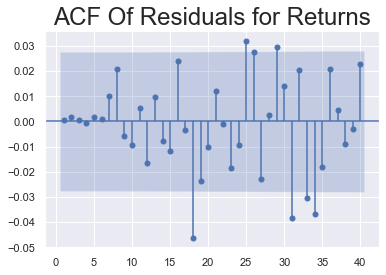

In [30]:
sgt.plot_acf(df.res_ret, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

### Residuals must be random

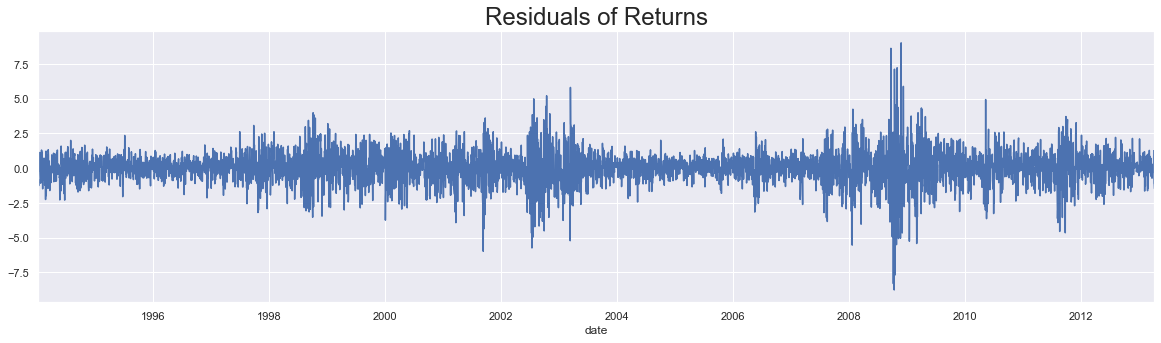

In [31]:
df.res_ret.plot(figsize=(20,5))
plt.title("Residuals of Returns", size=24)
plt.show()